# Photoface Data Explorer

### The purpose of this notebook is to explore the data of the photoface database. Here we process the database structure to extract its meta content and visualise the spread of the data

1) First, lets traverse the directory structure of the database and extract all of its meta data

In [20]:
import os

rootDir = '/home/arthur/faceSample' # The directory of the photoface database
metaData = []


# Traverse the directory structure of the photo face database to get the meta data for each session
# Each subject
for iDir, subjectDirs, files in os.walk(rootDir):
    for subjectDir in subjectDirs:
        subjectPath = os.path.join(rootDir, subjectDir)
        # Each session
        for jDir, sessionDirs, subjectFiles in os.walk(subjectPath):
            for sessionDir in sessionDirs:
                sessionPath = os.path.join(subjectPath, sessionDir)
                metaFilePath = sessionPath + '/metadataII.txt'
                if os.path.isfile(metaFilePath):
                    # Extract the meta data as csv values into a list
                    sessionMeta = open(metaFilePath).read().split(',')
                    # Remove white spaces
                    sessionMeta = list(map(lambda s: s.strip(), sessionMeta))
                    # Take 7 elements as the last one is \n
                    metaData.append(sessionMeta[:7])
                    
# Print the meta data values to see their structure
print(metaData)
%store metaData

[['male', 'no', 'none', '1', 'ok', '', 'blankstare'], ['male', 'no', 'none', '1', 'ok', '', 'blankstare'], ['male', 'no', 'none', '1', 'ok', '', 'blankstare'], ['male', 'no', 'none', '1', 'ok', '', 'blankstare'], ['male', 'no', 'none', '1', 'ok', '', 'positive'], ['male', 'no', 'none', '1', 'ok', '', 'blankstare'], ['male', 'no', 'both', '1', 'ok', '', 'blankstare'], ['male', 'no', 'both', '1', 'ok', '', 'emoOther'], ['male', 'no', 'moustache', '1', 'ok', '', 'positive'], ['male', 'no', 'stubble', '1', 'blur', '', 'blankstare'], ['male', 'no', 'none', '1', 'ok', '', 'blankstare'], ['male', 'no', 'none', '1', 'ok', '', 'positive'], ['male', 'no', 'none', '1', 'ok', '-other', 'blankstare'], ['male', 'no', 'none', '1', 'ok', '-other', 'blankstare'], ['male', 'no', 'stubble', '1', 'ok', '', 'positive'], ['male', 'no', 'stubble', '1', 'ok', '', 'positive'], ['male', 'no', 'both', '1', 'ok', '', 'blankstare'], ['male', 'no', 'both', '1', 'ok', '', 'blankstare'], ['male', 'no', 'stubble', '1'

2) Now that we have a list of all the session's meta values, lets aggregate the values to totals

In [11]:
from pandas import DataFrame
from IPython.display import display, HTML

def generateEmptyTotals():
    gender = {'male': 0, 'female': 0}
    spectacles = {'no': 0, 'yes': 0}
    facialHair = {'none': 0, 'beard': 0, 'moustache': 0, 'both': 0, 'stubble': 0}
    pose = {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0}
    quality = {'ok': 0, 'blur': 0, 'dark': 0}
    occlusion = {'Mobile Phone': 0, 'hand': 0, 'hair': 0, '-other': 0, '': 0}
    emotion = {'blankstare': 0, 'positive': 0, 'negative': 0, '-other': 0, 'mouth ajar': 0, 'eyes closed': 0, 'emoOther': 0}
    return {
        'gender': gender,
        'spectacles': spectacles,
        'facialHair': facialHair,
        'pose': pose,
        'quality': quality,
        'occlusion': occlusion,
        'emotion': emotion
    }


%store -r metaData
df = DataFrame(data=metaData)
df.columns = ['gender', 'spectacles', 'facialHair', 'pose', 'quality', 'occlusion', 'emotion']
display(df[:20])
totals = generateEmptyTotals()
for metaValues in metaData:
    totals['gender'][metaValues[0]] += 1
    totals['spectacles'][metaValues[1]] += 1
    totals['facialHair'][metaValues[2]] += 1
    totals['pose'][metaValues[3]] += 1
    totals['quality'][metaValues[4]] += 1
    totals['occlusion'][metaValues[5]] += 1
    totals['emotion'][metaValues[6]] += 1

%store totals
%store -d metaData

,gender,spectacles,facialHair,pose,quality,occlusion,emotion
0,male,no,none,1,ok,,blankstare
1,male,no,none,1,ok,,blankstare
2,male,no,none,1,ok,,blankstare
3,male,no,none,1,ok,,blankstare
4,male,no,none,1,ok,,positive
5,male,no,none,1,ok,,blankstare
6,male,no,both,1,ok,,blankstare
7,male,no,both,1,ok,,emoOther
8,male,no,moustache,1,ok,,positive
9,male,no,stubble,1,blur,,blankstare


Stored 'totals' (dict)


3) Now that we have the meta aggregates, lets visualize these so we can get a feel for the spread of data

In [12]:
# This is a hack so that the IPython notebook can find my util module by adding the current working dir to its path
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

3 a) Firstly, lets see the propotion of males to females

dict_keys(['male', 'female'])
dict_values([34, 2])


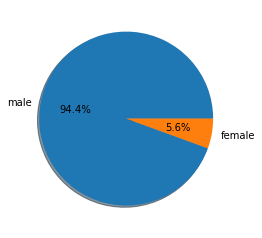

In [13]:
from util import plotHelper
plotHelper.plotPie(totals['gender'])

3 b) Now the distribution of subjects wearing glasses

dict_keys(['yes', 'no'])
dict_values([8, 28])


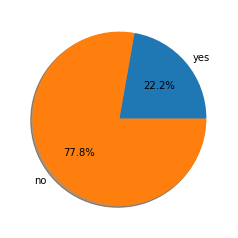

In [14]:
from util import plotHelper
plotHelper.plotPie(totals['spectacles'])

3 c) The distribution of subjects that had facial hair

dict_keys(['none', 'moustache', 'both', 'beard', 'stubble'])
dict_values([22, 3, 6, 0, 5])


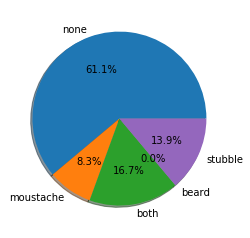

In [15]:
from util import plotHelper
plotHelper.plotPie(totals['facialHair'])

3 d) Pose variance

dict_keys(['4', '3', '5', '1', '2'])
dict_values([0, 0, 0, 34, 2])


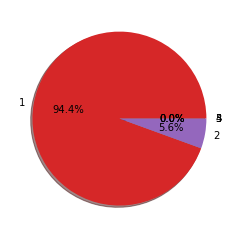

In [16]:
from util import plotHelper
plotHelper.plotPie(totals['pose'])

3 e) The range of quality

dict_keys(['dark', 'ok', 'blur'])
dict_values([0, 32, 4])


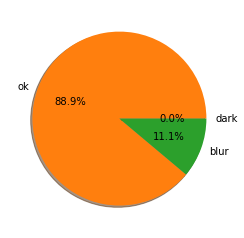

In [17]:
from util import plotHelper
plotHelper.plotPie(totals['quality'])

3 f) Any occlusions

dict_keys(['', 'Mobile Phone', 'hand', '-other', 'hair'])
dict_values([34, 0, 0, 2, 0])


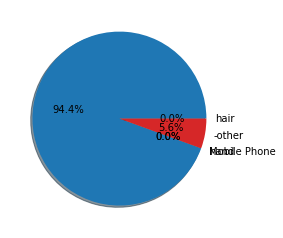

In [18]:
from util import plotHelper
plotHelper.plotPie(totals['occlusion'])

3 g) Distribution of subjects representing emotional states

dict_keys(['mouth ajar', '-other', 'blankstare', 'emoOther', 'eyes closed', 'positive', 'negative'])
dict_values([0, 0, 26, 2, 0, 8, 0])


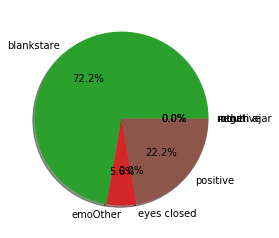

In [19]:
from util import plotHelper
plotHelper.plotPie(totals['emotion'])